## Забелина Инесса 303 группа. Задача 1, Вариант 22.

## 1. Постановка задачи 



##### Используя схему бегущего счета и итерационные методы, решить задачу:   

\begin{cases}
\frac{\partial u}{\partial t} - \frac{2u}{1+(1+u^2)^2}  \frac{\partial u}{\partial x} = 0, \; -1\leq x\leq 0, \\
u(x, 0) = x^2+1, \\
u(0, t) = e^{-t}.
\end{cases}


##### Квазилинейное уравнение:
\begin{equation}
    a(x,t,u)\frac{\partial u}{\partial t} + b(x,t,u)\frac{\partial u}{\partial x} = f(x,t,u),
\end{equation}

   где 
\begin{equation}   
   a(x,t,u) = 1, b(x,t,u) = -\frac{2u}{1+(1+u^2)^2}, f(x,t,u) = 0; 
\end{equation}

## 2. Исследование характеристик 

#### Уравнения характеристик:

\begin{equation}
\frac{dt}{1} = - \frac{1+(1+u^2)^2}{2u} {dx} = \frac{du}{0}
\end{equation}

\begin{cases}
u = u(x^{*}, t^{*}) = \text{const}, \\
t - t^{*} = - \frac{1+(1+u^2)^2}{2u} (x-x^{*}).
\end{cases}

#### Получим два семейства характеристик, учитывая граничные и начальные условия:

1) $ t^{*}=0, u(x^{*}, t^{*}) = u(x^{*}, 0) = (x^{*})^{2}+1 $,
\begin{equation}
t = - \frac{1+(1+((x^{*})^2+1)^2)^2}{2((x^{*})^2+1)} \cdot (x-x^{*})
\end{equation}
2) $x^{*}=0, u(x^{*}, t^{*}) = u(0, t^{*}) = e^{-t^{*}}$,
\begin{equation}
t = - \frac{1+(1+e^{-2t^{*}})^2}{2e^{-t^{*}}} \cdot x + t^{*}
\end{equation}


### Построим проекции характеристик для различных $x^{*}, t^{*} $  на плоскости (x,t):

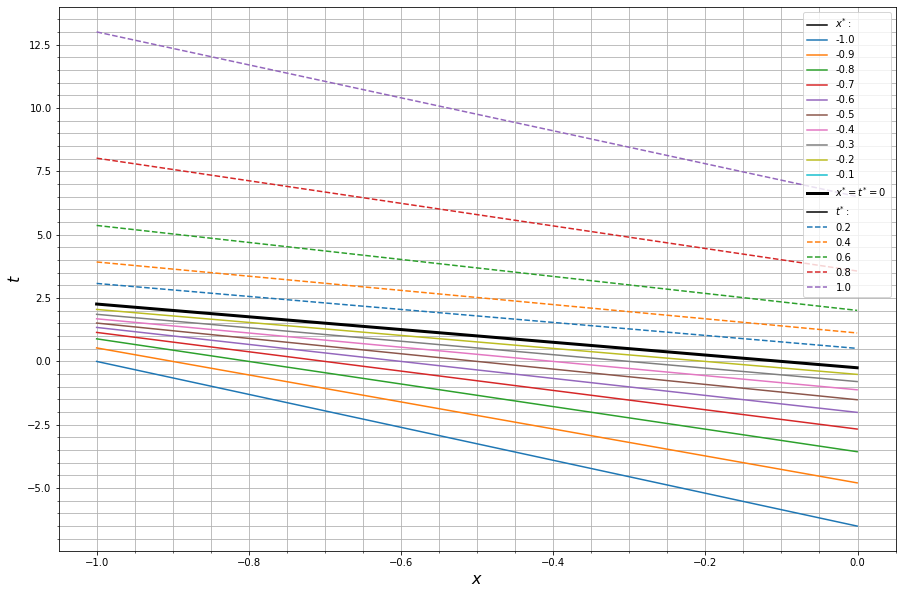

In [70]:
import matplotlib.pyplot as plt
from math import*

fig = plt.figure(figsize = (15,10))


def myFunction1(x, a):
    return -(1 + (1 + (a ** 2 + 1) ** 2) ** 2) / (2 * (a ** 2 + 1)) * (x - a)  # a = x^{*}


def myFunction2(x, b):
    return -(1 + (1 + exp(-2 * b)) ** 2) / (2 * exp(-b)) * x + b  # b = t^{*}


x = np.arange(-1, 0, 0.0005)
t = np.arange(0, 10, 0.0005)
a = np.arange(-1, 0, 0.1)
b = np.arange(0.2, 1.2, 0.2)
n = int(len(a))
m = int(len(b))


plt.plot(0,0, linestyle="-", c  = "black" ,label= "$x^{*}:$" )    

for i in range(n):
    plt.plot(x, myFunction1(x, a[i]), linestyle="-",  label=  round(a[i],1) )


plt.plot(x, myFunction1(x, a[i]), linestyle="-", lw = 3, c = "black",  label= "$x^{*} = t^{*} = 0$" ) 

plt.plot(0,0, linestyle="-", c  = "black", label= "$t^{*}: $" )
   
for i in range(m):
    plt.plot(x, myFunction1(x, b[i]), linestyle="--" , label= round(b[i],1) )    

# plt.yticks(np.arange(0.05,0.4,0.1))
# plt.xticks(np.arange(200,500,100))
# plt.xlim(200,500)
# plt.ylim(0.05,0.4)
#plt.title(, color='blue', fontsize=12)

plt.ylabel("$ t $", color='Black', fontsize=16)
plt.xlabel("$ x $", fontsize=16)
plt.minorticks_on()
plt.grid(b=True, which='both')
plt.legend()
plt.show()

#### На интервале $x \in [-1; 0]$ проекции  характеристик не пересекаются, значит решение на этом интервале непрерывно и определенно однозначно.

## 3. Построение разностной схемы

#### Введем в области $\Omega=\{(x,t):-1\leq x<0,~~0<t<T\} $ разностную сетку
\begin{equation}
\omega_{h, \tau} = 
\begin{cases}
x_{i}=i \cdot h, \;\; h = \frac{1}{N}, \;\; i=\overline{0, N}\\
t_{j} = j \cdot \tau, \;\; \tau = \frac{1}{M}, \;\; m=\overline{0, M} 
\end{cases}
\end{equation}
#### где N - число узлов вдоль оси x, M - число узлов вдоль оси t, h - шаг по координате, $\tau$ - шаг по времени.

#### Учитывая, что  

$$ -\frac{2u}{1+(1+u^2)^2} \cdot \frac{\partial u}{\partial x} = \frac{\partial (-arctg(1+u^2))}{\partial x} $$

#### перепишем исходное уравнение:

$$ \frac{\partial u}{\partial t} + \frac{\partial (-arctg(1+u^2))}{\partial x} = 0 $$

#### Введем сеточные функции $ y_{i}^{j} = u(x_{i},t_{j}) $ и $F_{i}^{j} = F(y_{i}^{j}) = -arctg(1+(y_{i}^{j})^2)$

####  Так как решение в рассматриваемой области непрерывно, то будем использовать четырехточечную разностную схему: 

![](4-dots.png "Четырехточечный шаблон")


#### Разностная аппроксимация  исходной задачи в точке $(x_{i} + h/2, t_{j} + \tau/2) $ выглядит следующим образом:
\begin{equation}
\begin{cases}
\frac{y_{i}^{j+1}-y_{i}^{j}+y_{i+1}^{j+1}-y_{i+1}^{j}}{2\tau}+\frac{F_{i+1}^{j}-F_{i}^{j}+F_{i+1}^{j+1}-F_{i}^{j+1}}{2h}=0\\
y_{i}^{0} = x_{i}^2 +1, \;\;  
\\
y_{0}^{j} = e^{-t_{j}}, \;\; \\
\end{cases}
\end{equation}

## 4. Схема бегущего счета

#### Данную задачу будем решать при помощи схемы бегущего счета. 
Значение сеточной функции $ y^{m+1}_{n+1} $ неизвестно, но нам известны все значения, соответствующие начальному( $y^0_n$ ) и граничному( $y^{m}_0$ ) условиям. Таким образом, зная значения в трех соседних точках: $y^{0}_0, y^{0}_1, y^{1}_0$, мы можем численно найти значение в четвертой точке $y^{1}_1$. Зная это значение, мы можем найти по трем известным точкам либо $y^{2}_1$, либо $y^{1}_2$. И так далее, заполняя найденными значениями сетку.
#### Воспользуемся итерационным методом решения ( методом Ньютона): 

$$ f(y_{i+1}^{j+1}) = \frac{y_{i+1}^{j+1}}{2\tau}+\frac{F_{i+1}^{j+1}}{2h}+\frac{y_{i}^{j+1}-y_{i}^{j}-y_{i+1}^{j}}{2\tau}+\frac{F_{i+1}^{j}-F_{i}^{j}-F_{i}^{j+1}}{2h} = 0$$

Пусть известно некоторое приближение ${y^{j+1}_{i+1}}^{(s)}$  к  $\;\;  {y^{j+1}_{i+1}}$.
С ростом $ s $ значения ${y^{j+1}_{i+1}}^{(s)}$ должны приближаться к исходному корню, а приращения $\delta_s = {y^{j+1}_{i+1}} - {y^{j+1}_{i+1}}^{(s)}$ уменьшаться.

Тогда, раскладывая $f(y_{i+1}^{j+1})$ в ряд Тейлора вблизи точки ${y_{i+1}^{j+1}}^{(s)}$  и пренебрегая нелинейными по $\delta_s$ слагаемыми, получаем:
\begin{eqnarray}
f(y_{i+1}^{j+1}) =  f({y_{i+1}^{j+1}}^{(s)} + \delta_s) \approx f({y_{i+1}^{j+1}}^{(s)}) + f'({y_{i+1}^{j+1}}^{(s)}) \frac{(y_{i+1}^{j+1} - {y_{i+1}^{j+1}}^{(s)})}{1!} = 0
\end{eqnarray}
Получаем итерационный процесс нахождения решения:

$$ {y^{j+1}_{i+1}}^{(s+1)} = {y^{j+1}_{i+1}}^{(s)} - \frac{ f({y^{j+1}_{i+1}}^{(s)}) }  { f'({y^{j+1}_{i+1}}^{(s)}) } $$

Остановимся, когда достигнем заданной точности $ \epsilon $: $$ | {y^{j+1}_{i+1}}^{(s+1)} - {y^{j+1}_{i+1}}^{(s)} | \leq \epsilon $$

## 5. Аппроксимация

#### Вычислим порядок аппроксимации.
#### Для этого разложим значения функции $y$ в узлах сетки в ряд Тейлора до члена 3-го порядка включительно в точке $(x_i+\frac{h}{2};t_j+\frac{\tau}{2})$: 

$$\begin{aligned}
y^{j+1}_{i+1} = y^{j+0.5}_{i+0.5}+y^{j+0.5}_{i+0.5}\cdot (\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2}) + y^{j+0.5}_{i+0.5}\cdot\frac{1}{2!} (\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^2 +  y^{j+0.5}_{i+0.5}\cdot\frac{1}{3!}(\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^3 +  O(\tau^{4})+O(h^{4})\\
y^{j+1}_{i} = y^{j+0.5}_{i+0.5}+y^{j+0.5}_{i+0.5}\cdot (\frac{\partial}{\partial t}\frac{\tau}{2} - \frac{\partial}{\partial x}\frac{h}{2}) + y^{j+0.5}_{i+0.5}\cdot\frac{1}{2!} (\frac{\partial}{\partial t}\frac{\tau}{2} - \frac{\partial}{\partial x}\frac{h}{2})^2 +  y^{j+0.5}_{i+0.5}\cdot\frac{1}{3!}(\frac{\partial}{\partial t}\frac{\tau}{2} - \frac{\partial}{\partial x}\frac{h}{2})^3 +  O(\tau^{4})+O(h^{4})\\
y^{j}_{i+1} = y^{j+0.5}_{i+0.5}+y^{j+0.5}_{i+0.5}\cdot (-\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2}) + y^{j+0.5}_{i+0.5}\cdot\frac{1}{2!} (-\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^2 +  y^{j+0.5}_{i+0.5}\cdot\frac{1}{3!}(-\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^3 + O(\tau^{4})+ O(h^{4})\\
y^{j}_{i} = y^{j+0.5}_{i+0.5}-y^{j+0.5}_{i+0.5}\cdot (\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2}) - y^{j+0.5}_{i+0.5}\cdot\frac{1}{2!} (\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^2 -  y^{j+0.5}_{i+0.5}\cdot\frac{1}{3!}(\frac{\partial}{\partial t}\frac{\tau}{2} + \frac{\partial}{\partial x}\frac{h}{2})^3 +  O(\tau^{4})+O(h^{4})\\
\end{aligned}$$

Из данных соотношений получим: 

$$\begin{aligned}
\frac{y_{i}^{j+1}-y_{i}^{j}+y_{i+1}^{j+1}-y_{i+1}^{j}}{2\tau} = \frac{\partial y_{i+0.5}^{j+0.5}}{\partial t}+\frac{y_{txx}}{8}\cdot h^2 + \frac{y_{ttt}}{24}\cdot \tau^2 + O(\tau^2 + h^2) \\
\frac{F_{i+1}^{j}-F_{i}^{j}+F_{i+1}^{j+1}-F_{i}^{j+1}}{2h} = \frac{\partial F_{i+0.5}^{j+0.5}}{\partial x}+\frac{y_{xtt}}{8}\cdot \tau^2 + \frac{y_{xxx}}{24}\cdot h^2 + O(\tau^2 + h^2)
\end{aligned}$$


Таким образом, разностная схема аппроксимирует задачу со вторым порядком малости как по пространственной координате, так и по времени.

## 6. Устойчивость

#### Исследуем четырехточечный шаблон на устойчивость с помощью спектрального метода. 
 
Воспользуемся методом замороженных коэффициентов:  выберем произвольную точку $(x_0,t_0)$ исследуемой обасти $\Omega$ и  зафиксируем коэффициент перед $\frac{\partial u}{\partial x}$ , обозначив $-\frac{2u(x_0,t_0)}{1+(1+u(x_o~,t_o))^2}~$ =  $С$. \
Теперь исследуемая схема приобретет вид:   

$$\begin{aligned}
\frac{y^{j+1}_{n+1}-y^{j}_{n+1}+y^{j+1}_{n}-y^{j}_{n}}{\tau}+C\frac{y^{j+1}_{n+1}-y^{j+1}_{n}+y^{j}_{n+1}-y^{j}_{n}}{h}=0\end{aligned}$$

Будем искать решение данного уравнения в виде
$y^j_{n}=\lambda^j_q e^{i q x_n}=\lambda^j_q e^{i\alpha_q n}$, где q  -
произвольное вещественное число, $ \alpha_q = qh$, $ \lambda_q$ - множитель роста.
#### После подстановки получим: 

$$\begin{aligned}
\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+C\frac{\tau}{h}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0\end{aligned}$$


#### Тогда для $\lambda_q$ получим: 

$$\begin{aligned}
\lambda_q = \frac{e^{i\alpha_q}+1+\frac{C\tau}{h}(1-e^{i\alpha_q})}{e^{i\alpha_q}+1+\frac{C\tau}{h}(e^{i\alpha_q}-1)}\end{aligned}$$

$$\begin{aligned}
|\lambda_q | = 1\end{aligned}$$

Из данного соотношения получаем, что
условие $|\lambda(\alpha)|\leq1$ справедливо для любых соотношений шагов по
координате и времени, и, следовательно, спектральный критерий выполнен.

## 7. Программа

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

eps = 0.00001  # точность

X = -1
T = 1.5

N = 100  # разбиение по оси x
M = 100  # разбиение по оси t

# искомое решение
y = np.zeros((N, M))

x = np.linspace(0, X, N)
t = np.linspace(0, T, M)

# шаг
h = float(X / (N - 1))
tau = float(T / (M - 1))

# граничные и начальные условия
y[:, 0] =  np.exp(- t)
y[0, :] = x ** 2 + 1


def p(r):
    return np.arctan(1 + r ** 2)


def Dp(r):
    return (-2) * r / (1 + (1 + r ** 2) ** 2)


# разностная схема
def f(r, a, b, c):
    return (a - b + r - c) / (2. * tau) - (p(r) - p(a) + p(c) - p(b)) / (2. * h)


# производная f
def df(r):
    return 1 / (2. * tau) + 1 / (2. * h) * Dp(r)


def solve(a, b, c):
    result = b
    d = eps + 1
    while d > eps:
        y = result
        result = y - f(y, a, b, c) / df(y)
        d = abs(y - result)
    return result


for i in range(1, N):
    for j in range(1, M):
        y[i,j] = solve(y[i - 1,j], y[i - 1,j - 1], y[i,j - 1])
        

   


#### Построим график решения:

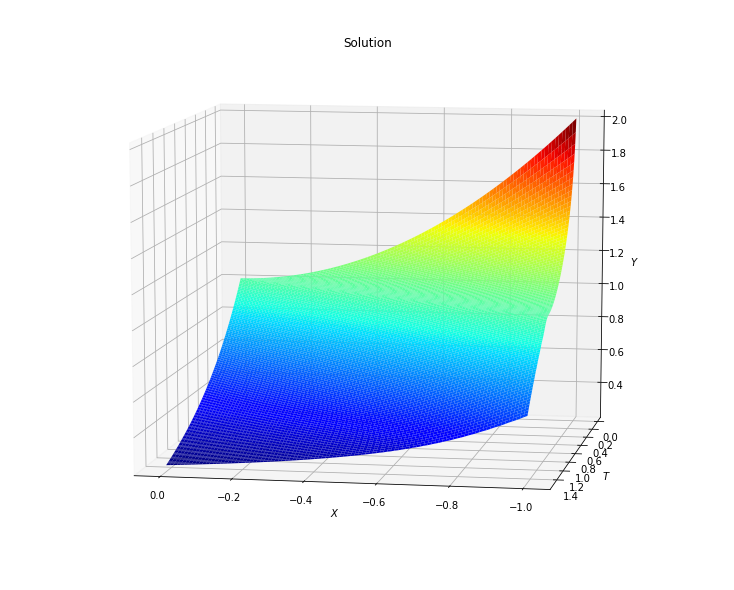

In [13]:
xn = np.linspace(0, -1, num = N)
tm = np.linspace(0, 1.5, num = M)

X, T = np.meshgrid(xn, tm)

frame = plt.figure(figsize=(10,8))
axes = Axes3D(frame)
axes.plot_surface(X,T,y,cmap='jet', linewidth=0.5,rstride=1, cstride=1)
axes.view_init(10, 100)
axes.set_xlabel('$X$')
axes.set_ylabel('$T$')
axes.set_zlabel('$Y$')
axes.set_title('Solution')
plt.show();


![](pic.pdf )